#Speech Processing Lab - Week 8

Name: S U Swakath 

Roll number: 180020036

Google Colab Link : https://colab.research.google.com/drive/1tR52y7KrlMTQz9yvOmkAVC0IVr44wuwr?usp=sharing

**Aim**
* To understand motivation behind Cepstral Analysis of speech
* To understand basic Cepstral Analysis approach
* To perform vocal tract and source information separation by Cepstral Analysis
* To understand liftering concept in cepstral Analysis
* To develop a pitch determination method by Cepstral analysis.
* To develop a formant information determination method by Cepstral analysis.


#Theory

**Introduction**

Speech is composed of excitation source and vocal tract system components. In order to analyze and model the excitation and system components of the speech independently and also use that in various speech processing applications, these two components have to be separated from the speech. The objective of cepstral analysis is to separate the speech into its source and system components without any a priori knowledge about source and / or system.

According to the source filter theory of speech production, voiced sounds are produced by exciting the time varying system characteristics with periodic impulse sequence and unvoiced sounds are produced by exciting the time varying system with a random noise sequence. The resulting speech can be considered as the convolution of respective excitation sequence and vocal tract filter characteristics. If e(n) is the excitation sequence and h(n) is the vocal tract filter sequence, then the speech sequence s(n) can be expressed as follows:

$$s(n) = e(n) * h(n) \ \ \ \ \ \ -(1)$$

This can be represented in frequency domain as,

$$S(\omega) = E(\omega) . H(\omega) \ \ \ \ \ \ -(2)$$

**Basic principles of Cepstral Analysis**

From the Eqn. (2) the magnitude spectrum of given speech sequence can be represented as,

$$|S(\omega)| = |E(\omega)| . |H(\omega)| \ \ \ \ \ \ -(3)$$

To linearly combine the E(ω) and H(ω) in the frequency domain, logarithmic representation is used. So the logarithmic representation of Eqn. (3) will be,

$$log|S(\omega)| = log|E(\omega)| + log|H(\omega)| \ \ \ \ \ \ -(4)$$

As indicated in Eqn. (4), the log operation transforms the magnitude speech spectrum where the excitation component and vocal tract component are multiplied, to a linear combination (summation) of these components. The separation can be done by taking the inverse discrete fourier transform (IDFT) of the linearly combined log spectra of excitation and vocal tract system components. It should be noted that IDFT of linear spectra transforms back to the time domain but the IDFT of log spectra transforms to quefrency domain or the cepstral domain which is similar to time domain. This is mathematically explained in Eqn. (5). In the quefrency domain the vocal tract components are represented by the slowly varying components concentrated near the lower quefrency region and excitation components are represented by the fast varying components at the higher quefrency region.

$$c(n) = IDFT(log|S(\omega)|) = IDFT(log|E(\omega)|) + IDFT(log|H(\omega)|) \ \ \ \ \ \ -(5)$$

The procedure of obtaining Cepstrum is captured in the following block diagram:

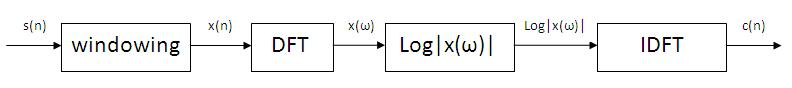

It can be observed that the variations in the lower quefrency region (near 0 axis) is due to vocal tract characteristics and the fast varying nature of the cepstrum towards the upper quefrency region represents the excitation characteristics of the short term speech segment. Methods have  to be devised to extract to these vocal tract and excitation characteristics independently. For this purpose a liftering operation is performed in the quefrency domain.

Procedure to extract formants:

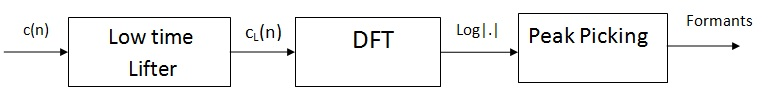

Procedure to extract pitch information:

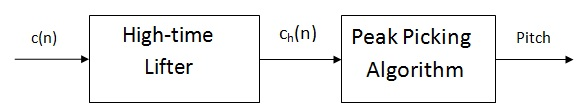

#Problem A

Fundamentals of cepstral analysis of speech:
* Select a frame (20 ms long) at the centre of a voiced segment. Plot the time waveform, the log-magnitude spectrum, and the cepstrum. 
* Repeat the above for an unvoiced segment.
* Write the procedure to determine whether the segment is voiced/unvoiced by inspecting the cepstrum. Apply this procedure to the two segments (in a and b).

**Procedure**
1. Record the audio "Speech Signal" using wavesurfer and upload the audio to google drive and access it in google colab.
2. Identify the different sound components in the audio and extract the sound /ee/ and /s/.
3. Extract a 20ms frame in middle part of the above mentioned sound components.
4. Compute the log magnitude spectrum of each frame, then compute the IDFT of the log magnitude spectrum to obtain the cepstrum of each frame.
5. Plot time domain plot, log magnitude spectrum and cepstrum for each frame.

In [1]:
# Mounting Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Changing directory
%cd /content/gdrive/MyDrive/Sem6/Speech Lab/Week8
!ls

/content/gdrive/MyDrive/Sem6/Speech Lab/Week8
Lab8.ipynb  week8audio.wav


In [34]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifft
from scipy import signal
import scipy.fft
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

#Functions 

# Magnitude spuctrum plot function
def magnitudeSpectrum(sound):
    
  # Computing the FFT of the sound
  sound_len = sound.shape[0]
  sound_fft = fft(sound)/sound_len

  # Computing the frequency array
  freqs = fftfreq(sound_len, 1/fs)
  
  #freqs = freqs[0:sound_len//2]
  #fft_db = 2*np.log10(np.abs(sound_fft[0:sound_len//2]))
  fft_db = np.log10(np.abs(sound_fft))
  return freqs,fft_db
def cepstrum(sound):
  #Computing the Log Magnitude Spectrum
  _,cep_fft_db = magnitudeSpectrum(sound)
  cepCoff = scipy.fft.ifft(cep_fft_db)
  return cepCoff

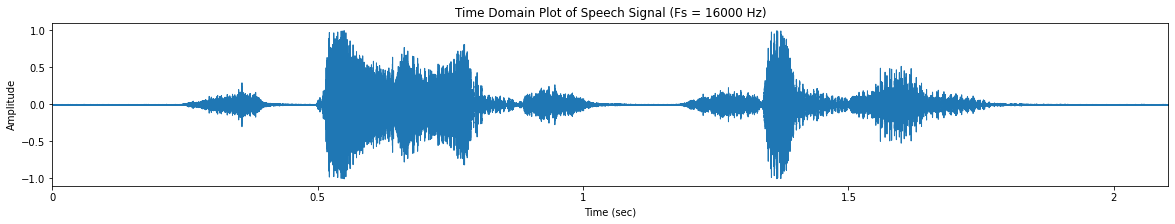

In [35]:
# Loading the audio into colab. Fs = 16kHz
audio, fs = librosa.load("week8audio.wav", sr = 16000)

# Plotting time domain plot of the audio
plt.figure(figsize=(20,3))
librosa.display.waveplot(audio, sr=fs);
plt.title("Time Domain Plot of Speech Signal (Fs = " +str(fs)+" Hz)")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

In [36]:
# Extracting different categories of sound in the speech
# The time stamp for each sound component was extracted from wavesurfer and they
# are as follows:
# /s/  - 0.236 s to 0.387 s
# /ee/ - 0.591 s to 0.756 s
# /ch/ - 0.883 s to 0.992 s
# /n/  - 1.407 s to 1.503 s
# sil  - 1.101 s to 1.165 s

s = audio[int(0.236*fs):int(0.387*fs)]
ee = audio[int(0.591*fs):int(0.756*fs)]
ch = audio[int(0.883*fs):int(0.992*fs)]
n = audio[int(1.407*fs):int(1.503*fs)]
sil = audio[int(1.101*fs):int(1.165*fs)]  

#Choosing one voiced sound (ee) and one unvoiced sound (s) and taking 20ms of the sound
frameSize = 0.020 * fs
choose = [ee,s]
soundName = ['/ee/','/s/']
soundType = ['Voiced','Unvoiced']
sounds = []
midFrame = frameSize/2
for curSound in choose:
  N = len(ee) / 2
  frame = curSound[int (N-midFrame): int (N+midFrame)]
  sounds.append(frame)

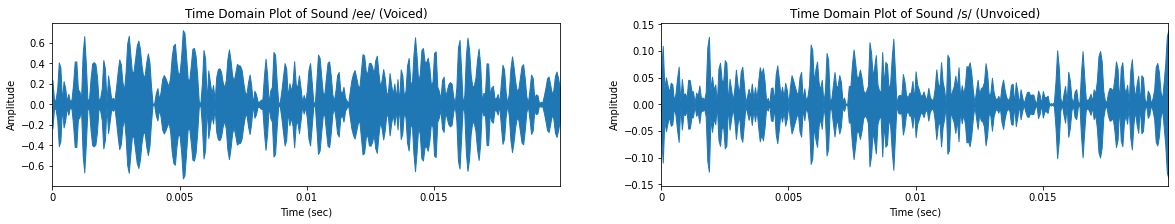

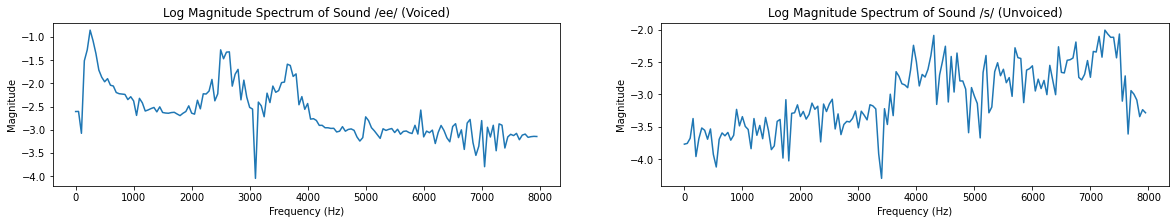

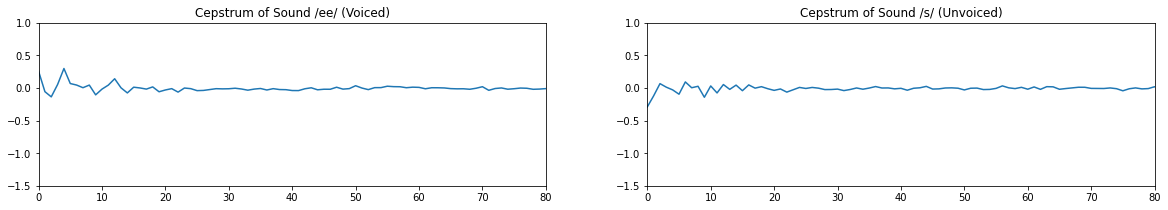

In [37]:
# Plotting time domain plot of the audio
plt.figure(figsize=(20,3))
i = 1
for curSound in sounds:
  plt.subplot(1,2,i)
  librosa.display.waveplot(curSound, sr=fs);
  plt.title("Time Domain Plot of Sound " + soundName[i-1] +" (" + soundType[i-1] + ")" )
  plt.xlabel('Time (sec)')
  plt.ylabel('Amplitude')
  i = i+1
plt.show()

# Plotting Log Magnitude Spectrum of the audio
soundLogSpectrum = []
plt.figure(figsize=(20,3))
i = 1
for curSound in sounds:
  freqs,freq_db = magnitudeSpectrum(curSound)
  curLen = curSound.shape[0]
  soundFreq = freqs[0:curLen//2]
  soundLogSpectrum.append(freq_db)
  plt.subplot(1,2,i)
  plt.plot(freqs[0: curLen//2],freq_db[0:curLen//2])
  plt.title("Log Magnitude Spectrum of Sound " + soundName[i-1] +" (" + soundType[i-1] + ")" )
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  i = i+1
plt.show()

# Plotting Cepstrum of the audio
plt.figure(figsize=(20,3))
i = 1
window = np.hamming(frameSize)
soundCepstrums = []
for curSound in sounds:
  curCep = cepstrum(np.multiply(curSound,window))
  soundCepstrums.append(curCep)
  #print(len(curCep))
  plt.subplot(1,2,i)
  plt.plot(curCep[1:].real)
  plt.title("Cepstrum of Sound " + soundName[i-1] +" (" + soundType[i-1] + ")" )
  # plt.xlabel('Frequency (Hz)')
  # plt.ylabel('Magnitude')
  plt.ylim([-1.5,1])
  plt.xlim([0,80])
  i = i+1
plt.show()

**Observation**

1. Using the above defined procedure we look at the cepstrum for /ee/ sound. We observe a major peak in the higher quefrency region
and infer that it is a voiced sound.
2. In case of the /ss/ sound, we do not find any such peak in the high quefrency region. So, we infer that it is an unvoiced sound.

#Problem B

Liftering:
* Extract the deconvolved vocal tract component and excitation component from the cepstrum by liftering.
* Write about how you used Low-Time Liftering and High-Time Liftering for extracting the above components.

**Procedure**
1. Perform Low-Time and High-Time liftering on the cepstrum computed in Problem B.
2. Later compute the DFT of the liftered cepstrum to obtain the vocal tract transfer function and input excitation Information.


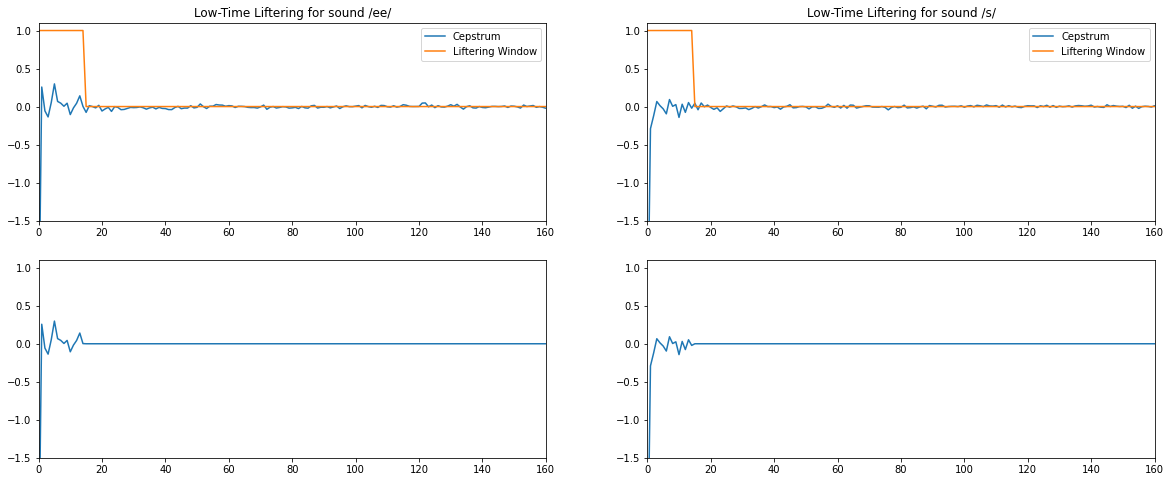

In [38]:
lowLifter = []
plt.figure(figsize=(20,8))
i = 1
lc = 15
for curCep in soundCepstrums:
  curLen = len (curCep)
  lowTime = np.zeros(curLen)
  lowTime[0:lc] = 1
  lowTime[curLen-lc:curLen] = 1
  curLif = np.multiply(lowTime,curCep)
  lowLifter.append(curLif)
  plt.subplot(2,2,i)
  plt.plot(curCep.real)
  plt.plot(lowTime)
  plt.ylim([-1.5,1.1])
  plt.xlim([0,160])
  plt.title("Low-Time Liftering for sound " + soundName[i-1])
  plt.legend(['Cepstrum','Liftering Window'])
  
  plt.subplot(2,2,i+2)
  plt.plot(curLif.real)
  plt.ylim([-1.5,1.1])
  plt.xlim([0,160])
  i = i+1
plt.show()

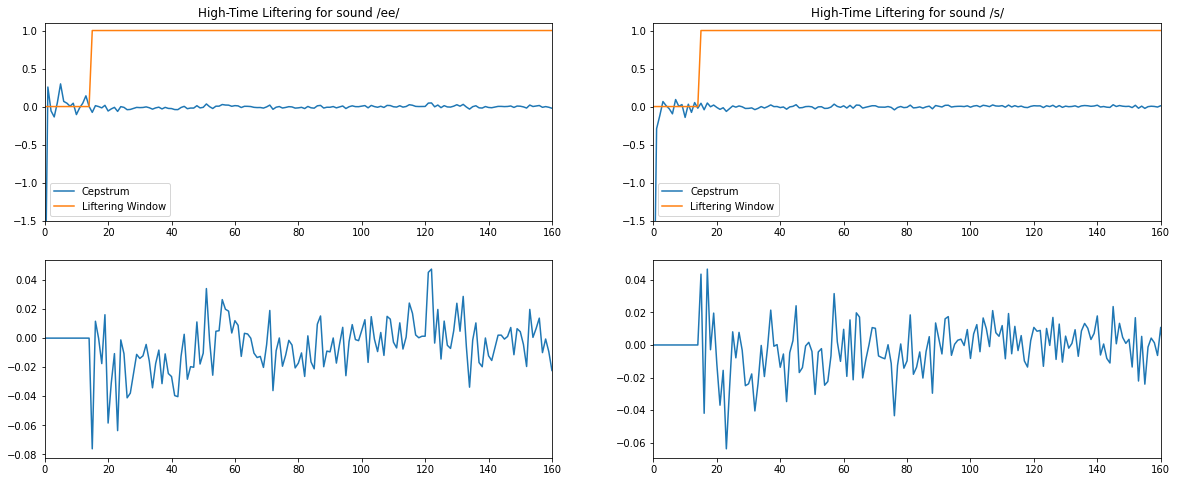

In [39]:
highLifter = []
plt.figure(figsize=(20,8))
i = 1
for curCep in soundCepstrums:
  curLen = len (curCep)
  highTime = np.zeros(curLen)
  highTime[lc:curLen-lc] = 1
  curLif = np.multiply(highTime,curCep)
  highLifter.append(curLif)
  plt.subplot(2,2,i)
  plt.plot(curCep.real)
  plt.plot(highTime)
  plt.ylim([-1.5,1.1])
  plt.xlim([0,160])
  plt.title("High-Time Liftering for sound " + soundName[i-1])
  plt.legend(['Cepstrum','Liftering Window'])
  
  plt.subplot(2,2,i+2)
  plt.plot(curLif.real)
  plt.xlim([0,160])
  i = i+1
plt.show()

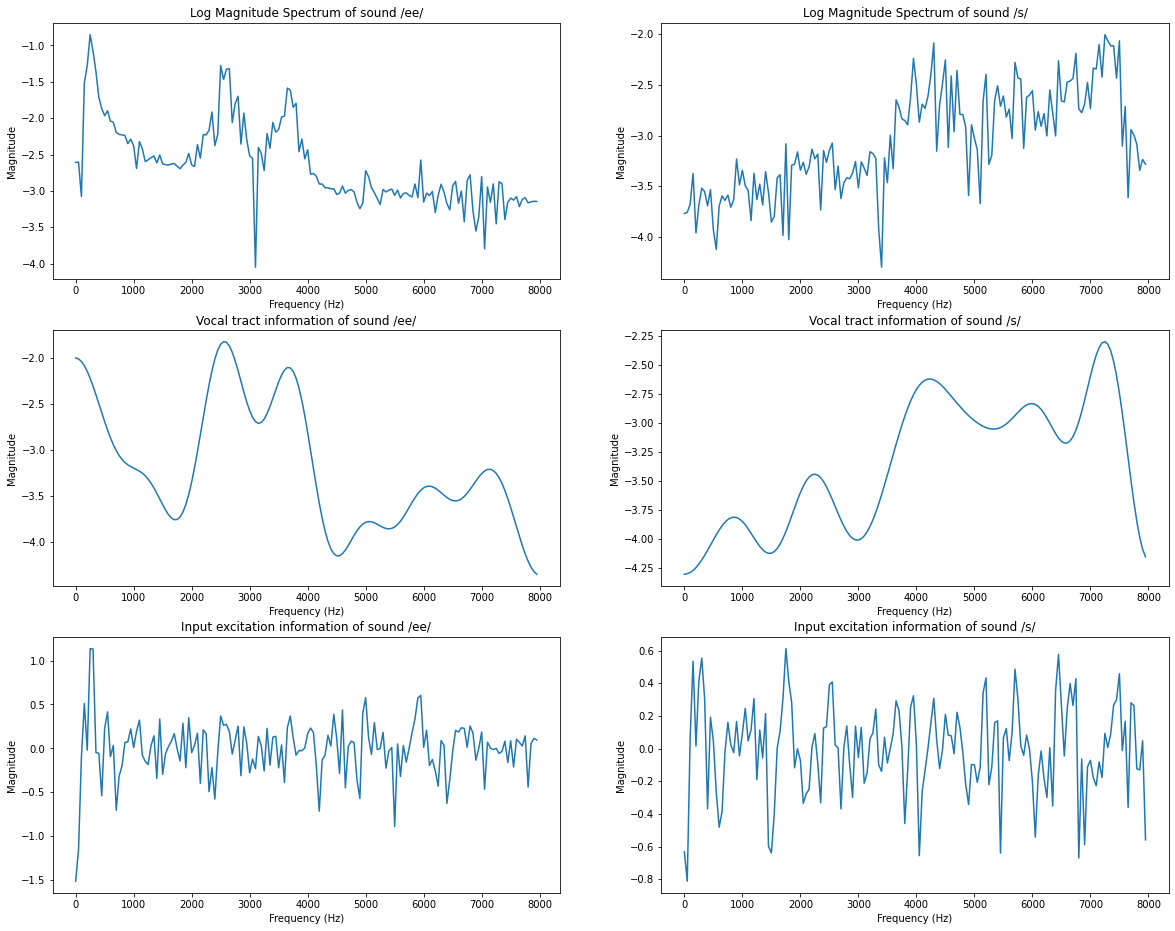

In [40]:
soundVocal = []
soundExcitation = []
plt.figure(figsize=(20,16))
for i in range(2):
  curLow = lowLifter[i]
  curHigh = highLifter[i]
  curLen = curLow.shape[0]
  vocal = fft(curLow)
  vocal = vocal[0:curLen//2]
  excitation = fft(curHigh)
  excitation = excitation[0:curLen//2]
  soundVocal.append(vocal)
  soundExcitation.append(excitation)
  curLogMag = soundLogSpectrum[i]
  curLogMag = curLogMag[0:curLen//2]
  plt.subplot(3,2,i+1)
  plt.plot(soundFreq,curLogMag)
  plt.title("Log Magnitude Spectrum of sound " +soundName[i])
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")
  plt.subplot(3,2,i+3)
  plt.plot(soundFreq,vocal.real)
  plt.title("Vocal tract information of sound " +soundName[i])
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")
  plt.subplot(3,2,i+5)
  plt.plot(soundFreq,excitation.real)
  plt.title("Input excitation information of sound " +soundName[i])
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")
plt.show()

**Observation**

1. We observe that the vocal tract information in both cases follows the log-magnitude spectrum closely, which is expected.
2. We also observe that the excitation information contains the low frequency peaks exactly same as the log-magnitude spectrum.

#Problem C

Pitch estimation by cepstral analysis:
* In the case of the voiced segment, estimate the pitch of the voiced speech segment using the cepstral analysis. Explain your procedure.

**Procedure**

Find the peak of the Input excitation transfer function computed in Problem B to obtain the Pictch of the voiced segment. 

In [41]:
i = 0
curExcitation = soundExcitation[i] #accessing the excitation function of sound /ee/
curPitchFreq = soundFreq[np.argmax(curExcitation)]
curPitchPeriod = 1/curPitchFreq
print("Pitch ("+ soundName[i] +") = " , curPitchFreq, " Hz ")

Pitch (/ee/) =  250.0  Hz 


#Problem D

Formant estimation by cepstral analysis:
* Using liftered cepstrum, estimate the frequencies of the first three resonances of the vocal tract of the voiced speech frame. Explain your procedure. Plot the log magnitude spectrum that shows the formant information (while not having the excitation information).

* Repeat the above for the unvoiced speech frame.

**Procedure**

1. To estimate the frequencies of the first 3 resonances of the vocal tract of the voiced speech frame we make use of the low-time liftered
signal.
2. Take the DFT of the low-time liftered signal to obtain the vocal tract information.
3. Pick the first 3 peaks of the signal. The frequencies corresponding to these peaks are the formant frequencies of the voiced speech
segment.
4. Plot the log-magnitude spectrum showing the formant information.

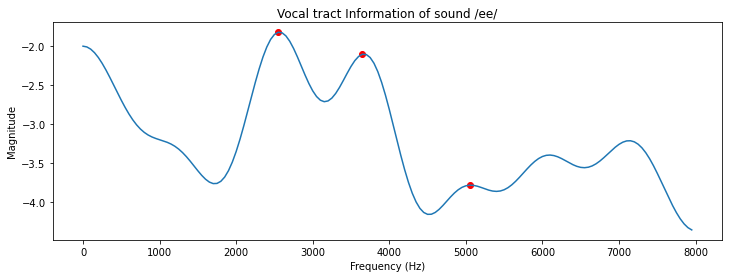

[2550. 3650. 5050.]


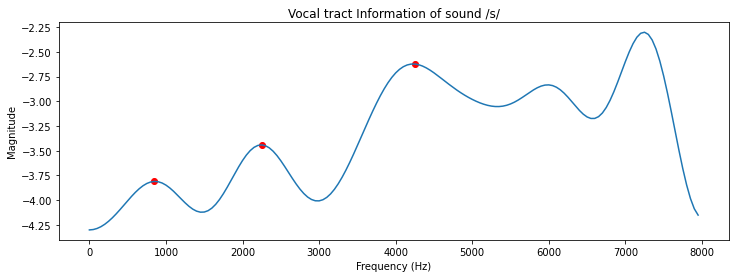

[ 850. 2250. 4250.]


In [42]:
def findPeaks(spec):
  peakArg = []
  for i in range(len(spec)):
    # if i == 0:
    #   if spec[i+1] < spec[i]:
    #     peakArg.append(i)

    if i>0 and i<(len(spec)-1):
      if (spec[i-1]<spec[i]) and (spec[i+1]<spec[i]):
        peakArg.append(i)
  return peakArg

i = 0;
for curVocal in soundVocal:
  curArgs = findPeaks(curVocal)
  if len(curArgs) >=3:
    curArgs = curArgs[0:3]
  curVocal = curVocal.real
  plt.figure(figsize=(12,4))
  plt.plot(soundFreq,curVocal)
  plt.scatter(soundFreq[curArgs], curVocal[curArgs], marker='o', color='red')
  plt.title("Vocal tract Information of sound " + soundName[i])
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Magnitude")
  plt.show()
  print(soundFreq[curArgs])
  i = i+1

#References and Tools

1. For theory concepts :- https://vlab.amrita.edu/index.php?sub=59&brch=164&sim=615&cnt=1
2. Wavesurfer:- https://sourceforge.net/projects/wavesurfer/